# Decision Tree Algorithm

********************************
Data set
********************************

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


********************************
Training Data Set Predication
********************************

[1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0]


********************************
Actual Result
********************************

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1]


**************

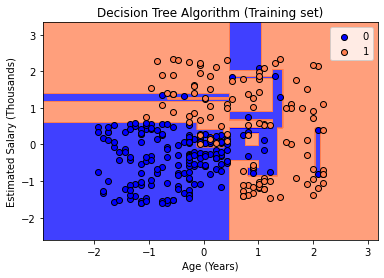



********************************
Actual Result
********************************



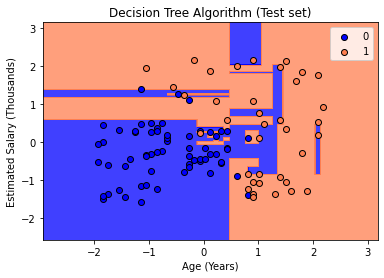

In [18]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as mtp

# Importing datasets
data_set = pd.read_csv('user_data.csv')
print("********************************\nData set\n********************************\n")
print(data_set.head())

x = data_set.iloc[:, [2, 3]].values
y = data_set.iloc[:, 4].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

# Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
classifier.fit(x_train, y_train)

# Predicting the test set result
y_pred = classifier.predict(x_test)
print("\n\n********************************\nTraining Data Set Predication\n********************************\n")
print(y_pred)

print("\n\n********************************\nActual Result\n********************************\n")
print(y_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("\n\n********************************\nAccuracy\n********************************\n")
print("Accuracy:", accuracy)

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

x1, x2 = nm.meshgrid(nm.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                      nm.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(['blue', 'coral']))

mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=['blue' if i == 0 else 'coral'], label=j, edgecolors='black')

mtp.title('Decision Tree Algorithm (Training set)')
mtp.xlabel('Age (Years)')
mtp.ylabel('Estimated Salary (Thousands)')

mtp.legend()
mtp.show()

print("\n\n********************************\nActual Result\n********************************\n")
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test

x1, x2 = nm.meshgrid(nm.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                      nm.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(['blue', 'coral']))

mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color=['blue' if i == 0 else 'coral'], label=j, edgecolors='black')

mtp.title('Decision Tree Algorithm (Test set)')
mtp.xlabel('Age (Years)')
mtp.ylabel('Estimated Salary (Thousands)')

mtp.legend()
mtp.show()